# A/B Testing for ShoeFly.com

This will be an online shoe store analysis, through an A/B Test.   
They have two different versions of an ad, which they have placed in emails, as well as in banner ads on Facebook, Twitter, and Google.  
They want to know how the two ads are performing on each of the different platforms on each day of the week, by using aggregate measures.


## A/B Testing for ShoeFly.com

In [137]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [27]:
# loading csv file
ad_clicks = pd.read_csv('ad_sources.csv')
# another way, by specifying the path: ad_clicks = pd.read_csv('C:\\Users\\Admin\\Desktop\\py4e\\Codecademy\\ab_testing\\ad_sources.csv',sep=',')
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


In [28]:
(ad_clicks.columns)

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group'],
      dtype='object')

2.

The manager wants to know which ad platform is getting the most views.

How many views came from each utm_source?

In [32]:
# 2. Views byt utm_source
utm_views = ad_clicks.groupby('utm_source').user_id.count().\
  sort_values(ascending=False).reset_index()
utm_views

,utm_source,user_id
0,google,680
1,facebook,504
2,email,255
3,twitter,215


3.

If the column ad_click_timestamp is not null, it means someone actually clicked on the ad that was displayed.

We will add a new column called 'is_click', which is True if ad_click_timestamp is not null and False otherwise.

In [33]:
#3. New Clicks column
ad_clicks['is_click'] = ~ad_clicks.ad_click_timestamp.isnull()
ad_clicks.head()


,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


4.

We want to know the percent of people who clicked on ads from each utm_source.

Start by grouping by utm_source and is_click and counting the number of user_id‘s in each of those groups. Save your answer to the variable clicks_by_source.

In [35]:
#4. Clicks by source
clicks_by_source = ad_clicks.groupby(['utm_source','is_click'])\
  .user_id.count().reset_index()
clicks_by_source


,utm_source,is_click,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


5.

The data as it is, it is not very easy to read, it needs to be reshaped, so we will create a pivot table from it to know which users clicked on the ad, based on the utm_source.

In [37]:
#5. Clicks Pivot table 
clicks_pivot = clicks_by_source.pivot(
  columns= 'is_click',
  index= 'utm_source',
  values='user_id'
).reset_index()

clicks_pivot

is_click,utm_source,False,True
0,email,175,80
1,facebook,324,180
2,google,441,239
3,twitter,149,66


6.

Now we will create a new column in `clicks_pivot` called *percent_clicked* which is equal to the percent of users who clicked on the ad from each utm_source.


In [59]:
#6. clicks percentage 
clicks_pivot['percent_clicked'] = round((clicks_pivot[True] / \
  (clicks_pivot[True] + clicks_pivot[False]))*100,1)
clicks_pivot

is_click,utm_source,False,True,percent_clicked
0,email,175,80,31.4
1,facebook,324,180,35.7
2,google,441,239,35.1
3,twitter,149,66,30.7


The best two click conversions came from Facebook and then Google, the least conversions came from Twitter. 

## Analyzing an A/B Test

7.

The column *experimental_group* tells us whether the user was shown Ad A or B.

Let's see if there were the same number of people shown both adds.

In [46]:
#7. A & B count for each experimental group 
ab_count = ad_clicks.groupby('experimental_group').user_id.count().reset_index()
print(ab_count) 

  experimental_group  user_id
0                  A      827
1                  B      827


The number of ads were shown to the same number of people

8.

Using the column is_click that we defined earlier, check to see if a greater percentage of users clicked on Ad A or B.

In [47]:
#8. True and False of each Experimental group

ab_tf = ad_clicks.groupby(['experimental_group','is_click'])\
  .user_id.count().reset_index()
ab_pivot = ab_tf.pivot(
  columns='is_click',
  index='experimental_group',
  values='user_id'
).reset_index()

ab_pivot['percent_clicked'] = ab_pivot[True]/ \
  (ab_pivot[True]+ab_pivot[False])

(ab_pivot)

is_click,experimental_group,False,True,percent_clicked
0,A,517,310,0.374849
1,B,572,255,0.308343


Group A had a greater conversion rate, they clicked more on the ads that they were shown.

9.

The Product Manager for the A/B test thinks that the clicks might have changed by day of the week.

We will start by creating 2 DataFrames: `a_clicks` and `b_clicks`, which contain only the results for A group and B group, respectively.

In [67]:
#9. Data frames by experimental group (a & b)

a_clicks = ad_clicks[ad_clicks.experimental_group == "A"]
b_clicks = ad_clicks[ad_clicks.experimental_group == "B"]

10.

Now for each group (a_clicks and b_clicks), we will calculate the percent of users who clicked on the ad by day.

In [78]:
# A 
a_click_pivot = a_clicks.groupby(['is_click','day'])\
  .user_id.count().reset_index()\
  .pivot(index='day',columns='is_click',values='user_id').reset_index()

a_click_pivot['percent_clicked'] = a_click_pivot[True]/ \
  (a_click_pivot[True]+a_click_pivot[False])

# B 
b_click_pivot = b_clicks.groupby(['is_click','day'])\
  .user_id.count().reset_index()\
  .pivot(index='day',columns='is_click',values='user_id').reset_index()

b_click_pivot['percent_clicked'] = b_click_pivot[True]/ \
  (b_click_pivot[True]+b_click_pivot[False])

print(a_click_pivot)
print(b_click_pivot)


is_click            day  False  True  percent_clicked
0            1 - Monday     70    43         0.380531
1           2 - Tuesday     76    43         0.361345
2         3 - Wednesday     86    38         0.306452
3          4 - Thursday     69    47         0.405172
4            5 - Friday     77    51         0.398438
5          6 - Saturday     73    45         0.381356
6            7 - Sunday     66    43         0.394495
is_click            day  False  True  percent_clicked
0            1 - Monday     81    32         0.283186
1           2 - Tuesday     74    45         0.378151
2         3 - Wednesday     89    35         0.282258
3          4 - Thursday     87    29         0.250000
4            5 - Friday     90    38         0.296875
5          6 - Saturday     76    42         0.355932
6            7 - Sunday     75    34         0.311927


Nummerically, we can see that the A group, had a higher conversion rate in generall, but it is not easy to read, so a graph will be created. 

11.

Plot 

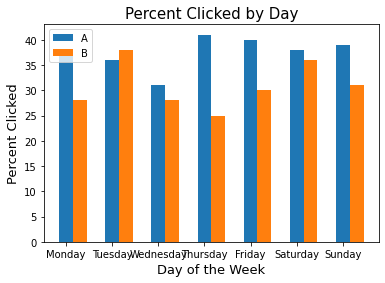

In [158]:
x = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
a_clicks_p = list(round(a_click_pivot.percent_clicked,2)*100)
b_clicks_p = list(round(b_click_pivot.percent_clicked,2)*100)
width = 0.3
pos = np.arange(len(x))
group = ['A','B']

plt.bar(np.arange(len(a_clicks_p)), a_clicks_p, width=width)
plt.bar(np.arange(len(b_clicks_p))+width, b_clicks_p, width=width)

plt.title ('Percent Clicked by Day',fontsize=15)
plt.xlabel('Day of the Week',fontsize=13)
plt.xticks(pos,x)
plt.ylabel('Percent Clicked',fontsize=13)

plt.legend(group,loc=2)

plt.show()

As we can see, in all days except for Tuesdays, **Ad A had a greater conversion rate** than B; so ad A should be selected if an ad campaign is to be launched. 